<a href="https://colab.research.google.com/github/CherylA24/HarrisCornerAlgorithm/blob/main/HarrisCornerAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Necessary Library

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as sig
from skimage.feature import corner_peaks

In [ ]:
# Gaussian filter for kernel 5x5

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [ ]:
# Find Derivatives with Sobel Filter (Function)
# Sobel operator kernels.

def gradient_x(imggray):
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

In [ ]:
# Harris Corner Detection Function

def harris_corner(img,window_size,k,threshold):

    # Load Image
    img = cv.imread(img)

    # Convert Image to Gray Scale
    gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    # Apply Gaussian Filter
    img_gaussian = gaussian_kernel(5)

    # Define height, width, and matrix for R
    height = img.shape[0]    
    width = img.shape[1]    
    matrix_M = np.zeros((height,width))
    
    #   Step 1 - Compute gaussian derivatives at each pixel with Sobel filter
    dx = gradient_x(img_gaussian)
    dy = gradient_y(img_gaussian)
    dy, dx = np.gradient(gray_img)

    # Calculate the second derivatives 
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )

    # Step 2 : Compute second moment matrix M in a Gaussian window around each pixel
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sumx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sumy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sumxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            # Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sumx2,Sumxy],[Sumxy,Sumy2]])

            # Step 3 - Compute corner response funciton R ( R=det(H)-k(Trace(H))^2 )
            determinant=np.linalg.det(H)
            trace=np.matrix.trace(H)
            R=determinant-k*(trace**2)
            matrix_M[y-offset, x-offset]=R
    
    # Step 4 - Apply a threshold
    cv.normalize(matrix_M, matrix_M, 0, 1, cv.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_M[y, x]
            if value>threshold:
                cv.circle(img,(x,y),3,(0,0,255))

    # Step 5 - Find Local Maxima of Response Function
    corners = corner_peaks(matrix_M)

    # Show Image      
    plt.figure(figsize=(10,10))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title("Corner Found")
    plt.xticks([])
    plt.yticks([])
    plt.show()

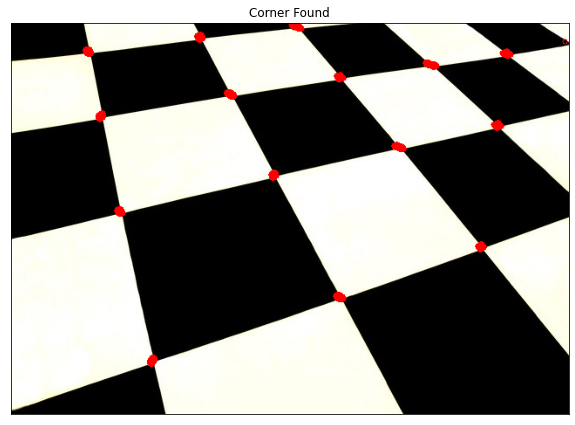

In [ ]:
harris_corner("chess.png", 5, 0.04, 0.30)